## Metastability

Computes the Metastability of orthoganlized low-pass filtered rsMEG Data. Following the documentation of Deco et. al 2017 "Single or multiple frequency generators in on-going brain activity: A mechanistic whole-brain model of empirical MEG data"

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os 
from scipy.signal import hilbert
import glob

In [3]:
Subject='S126'
os.chdir('results'+Subject) # Execute only once

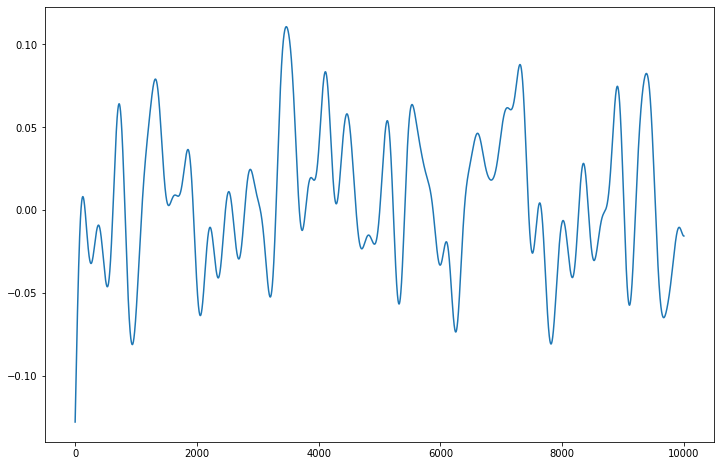

In [36]:
files = glob.glob('*low-ampl-env.npy') # list all numpy data fiels in current directory
dict_sig = {}
for file in files: 
    fcarrier = int(''.join([d for d in file if d.isdigit()]))
    signal = np.load(file)
    dict_sig[fcarrier] = signal 

exampleSignal = 4
plt.figure(figsize=(12,8))
plt.plot(dict_sig[exampleSignal][0,:10000]) # Plot one example signal

In [25]:
dict_analy = {} # Initialize dictionary for analytic signals
for key, sig in dict_sig.items():
    dict_analy[key] = hilbert(sig, axis=-1) # Compute the hilbert transform of all frequencies

In [26]:
dict_phase = {}
for key, analy_sig in dict_analy.items(): 
    dict_phase[key] = np.angle(analy_sig)

Text(0.5, 1.0, 'Phase')

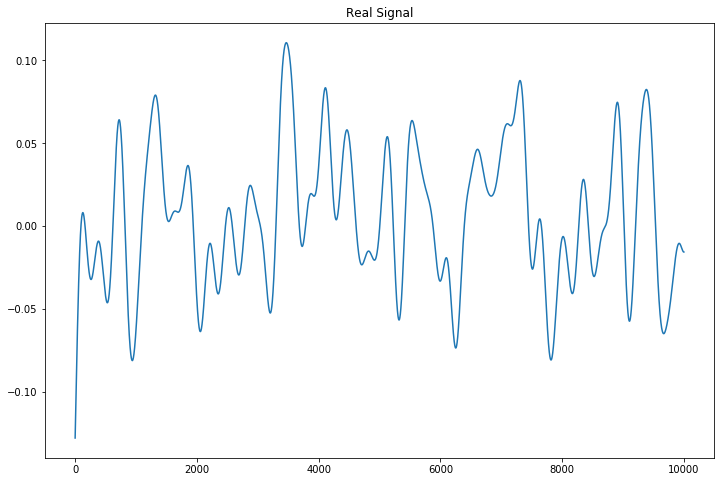

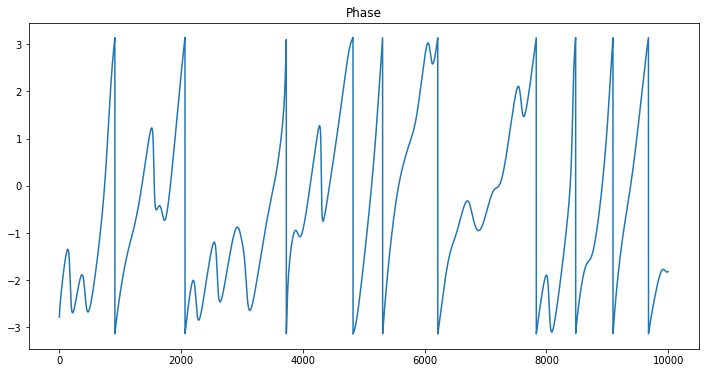

In [31]:
# Plot real-part of signal to check if the hilbert transform worked
plt.figure(figsize=(12,8))
plt.plot(np.real(dict_analy[exampleSignal][0,:10000])) 
plt.title('Real Signal')
# Plot phase for alpha frequency
plt.figure(figsize=(12,6))
plt.plot(dict_phase[exampleSignal][0,:10000])
plt.title('Phase')

In [32]:
dict_kuram = {}
for key, phase in dict_phase.items():
    ima_phase = phase * 1j # Multiply with imaginary element
    sum_phase = np.sum(np.exp(ima_phase), axis=0) # Sum over all areas
    kuramoto = np.abs(sum_phase) / ima_phase.shape[0] # Compute kuramoto parameter
    dict_kuram[key] = kuramoto # Save kuramoto parameter to dictionary

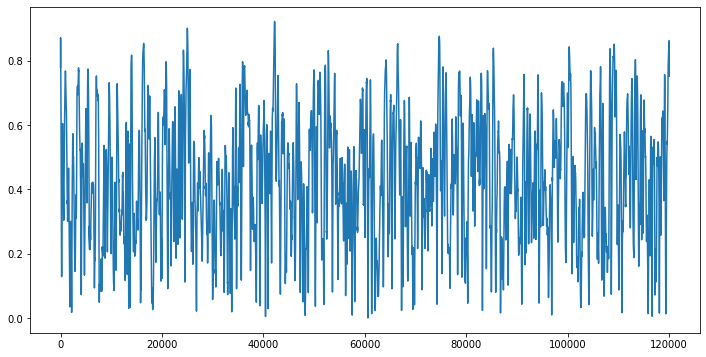

In [34]:
# Plot kuramoto parameter over time
plt.figure(figsize=(12,6))
plt.plot(dict_kuram[exampleSignal][::]) 

In [35]:
dict_meta = {}
for key, kuramoto in dict_kuram.items():
    dict_meta[key] = np.std(kuramoto, ddof=1) # Compute metastability as standard deviation of kuramoto parameter
    print(f"The metastability of {key} is: {dict_meta[key]}")

The metastability of 6 is: 0.1870589762192308
The metastability of 8 is: 0.18530712682085765
The metastability of 28 is: 0.15536358425822194
The metastability of 22 is: 0.173264674009475
The metastability of 18 is: 0.18320735454645043
The metastability of 26 is: 0.16151880431138516
The metastability of 16 is: 0.19181355571647024
The metastability of 20 is: 0.17943786939137998
The metastability of 4 is: 0.1919330036792397
The metastability of 14 is: 0.19008520224677425
The metastability of 10 is: 0.18403822457936245
The metastability of 24 is: 0.16991561630103913
The metastability of 12 is: 0.18288948995897858
